# import

In [30]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



pd.options.display.float_format = '{:.5f}'.format

df = pd.read_csv('C:\\project\\credit_fraud\\creditcard.csv\\creditcard.csv')

import warnings
warnings.filterwarnings(action='ignore')

# 데이터 확인

In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


In [32]:
# 전체 통계량
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,...,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,...,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,...,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,...,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,...,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,...,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


In [33]:
# 결측치 확인
df.isnull().sum().sum()

0

In [34]:
# 컬럼 확인
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

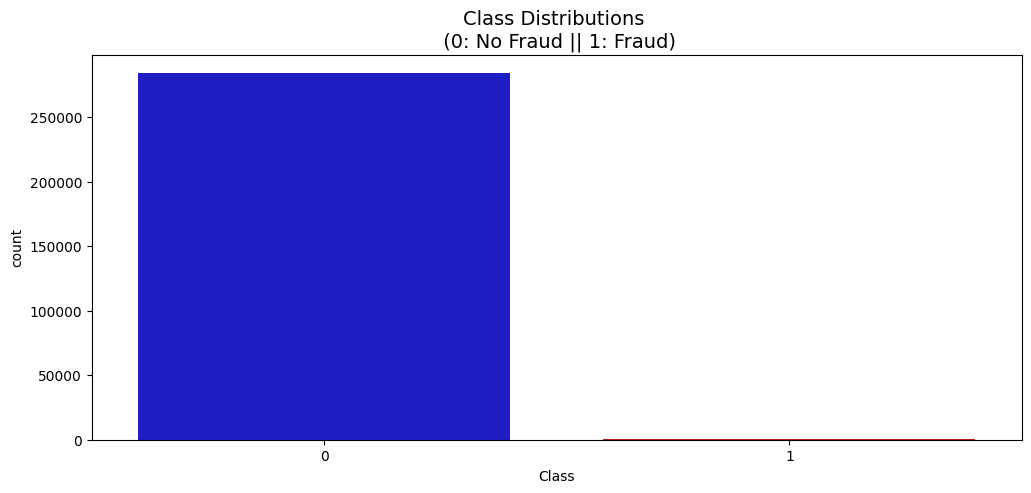

In [35]:
# 비율 확인
colors = ["#0101DF", "#DF0101"]
plt.figure(figsize = (12,5))
sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# 스케일링과 분포
- 다른 변수들 처럼 Time 변수와 Amount 변수를 스케일링
- 데이터프레임을 서브샘플링하여 정상 데이터와 이상 데이터의 비율을 맞춰 알고리즘이 이상과 정상을 더 잘 학습하도록 한다

### 서브샘플링 하는 이유
- 과적합 방지: 대부분의 데이터가 정상 데이터임, 하지만 모델이 이상을 탐지하길 바람
- 잘못된 상관관계: V 변수가 무슨 뜻인지 모름 -> 불균형데이터에서는 class와 feature들간의 실제 상관관계를 알 수 없음

In [36]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Robust 스케일러는 이상치에 영향을 덜 받는다

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis = 1, inplace = True)


In [37]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.78327,-0.99498,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,...,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,0
1,-0.26982,-0.99498,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,...,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,0
2,4.98372,-0.99497,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,...,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,0
3,1.41829,-0.99497,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,...,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,0
4,0.67058,-0.99496,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,...,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,0


# 데이터 분할하기
- 언더샘플링과 오버샘플링을 위해

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


# 랜덤 언더샘플링
- 균형 데이터셋을 만들어 모델이 과적합을 방지하기 위해 데이터를 제거하는 방식인 랜덤 언더샘플링 수행
1. 얼마나 불균형인지 파악
2. 492개의 이상 데이터만큼 492개의 정상 데이터 포함
3. 5:5비율의 클래스를 가진 서브샘플 확보 -> 데이터를 섞어 다시 확인 반복


In [39]:
# 데이터 섞기
df = df.sample(frac=1)

# 클래스 균형 맞추기(undersampling)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# 데이터 섞기
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
252101,-0.12590,0.83366,-1.02689,1.38345,0.36239,-1.33706,1.06055,-0.56861,1.99088,-1.22869,...,1.20868,-0.77477,-0.59898,-0.11145,-0.39777,-0.30289,0.00663,-0.01687,-0.78210,0
23422,9.71355,-0.61029,-2.17914,0.02022,-2.18273,2.57205,-3.66373,0.08157,0.26805,0.66044,...,1.95796,1.02642,0.29961,1.65680,0.32843,0.10646,0.69177,0.19678,0.24109,1
266814,-0.20191,0.91400,1.81844,0.11713,0.96995,3.90048,-0.77691,0.58707,-0.99750,0.25783,...,-0.22662,0.22030,0.77731,0.25280,0.02875,-0.46701,-0.02293,0.05504,-0.01522,0
226814,9.02047,0.70626,-2.40521,2.94382,-7.61665,3.53337,-5.41749,-0.11263,-1.32937,1.70942,...,-0.33871,0.65268,0.41413,0.02387,-0.26062,0.40532,0.02911,0.51981,-0.46954,1
15751,1.08978,-0.67558,-24.59024,14.04457,-26.27870,6.32009,-18.22451,-4.60997,-17.68100,16.21363,...,1.64920,1.77706,-1.80487,-1.14060,0.15223,1.71600,-0.22047,1.43495,0.42249,1


# 균형 분포에서 상관관계 확인

Distribution of the Classes in the subsample dataset
0   0.50000
1   0.50000
Name: Class, dtype: float64


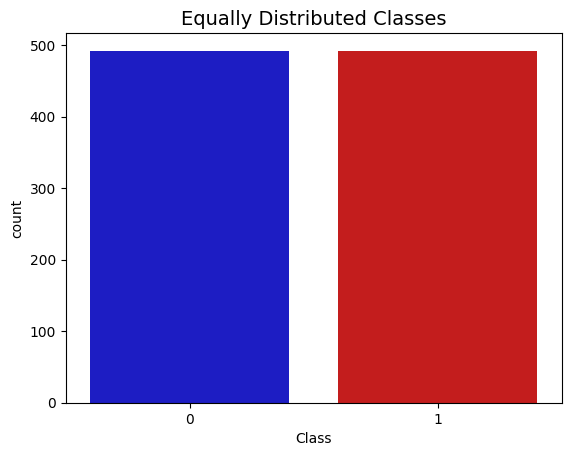

In [40]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x = 'Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

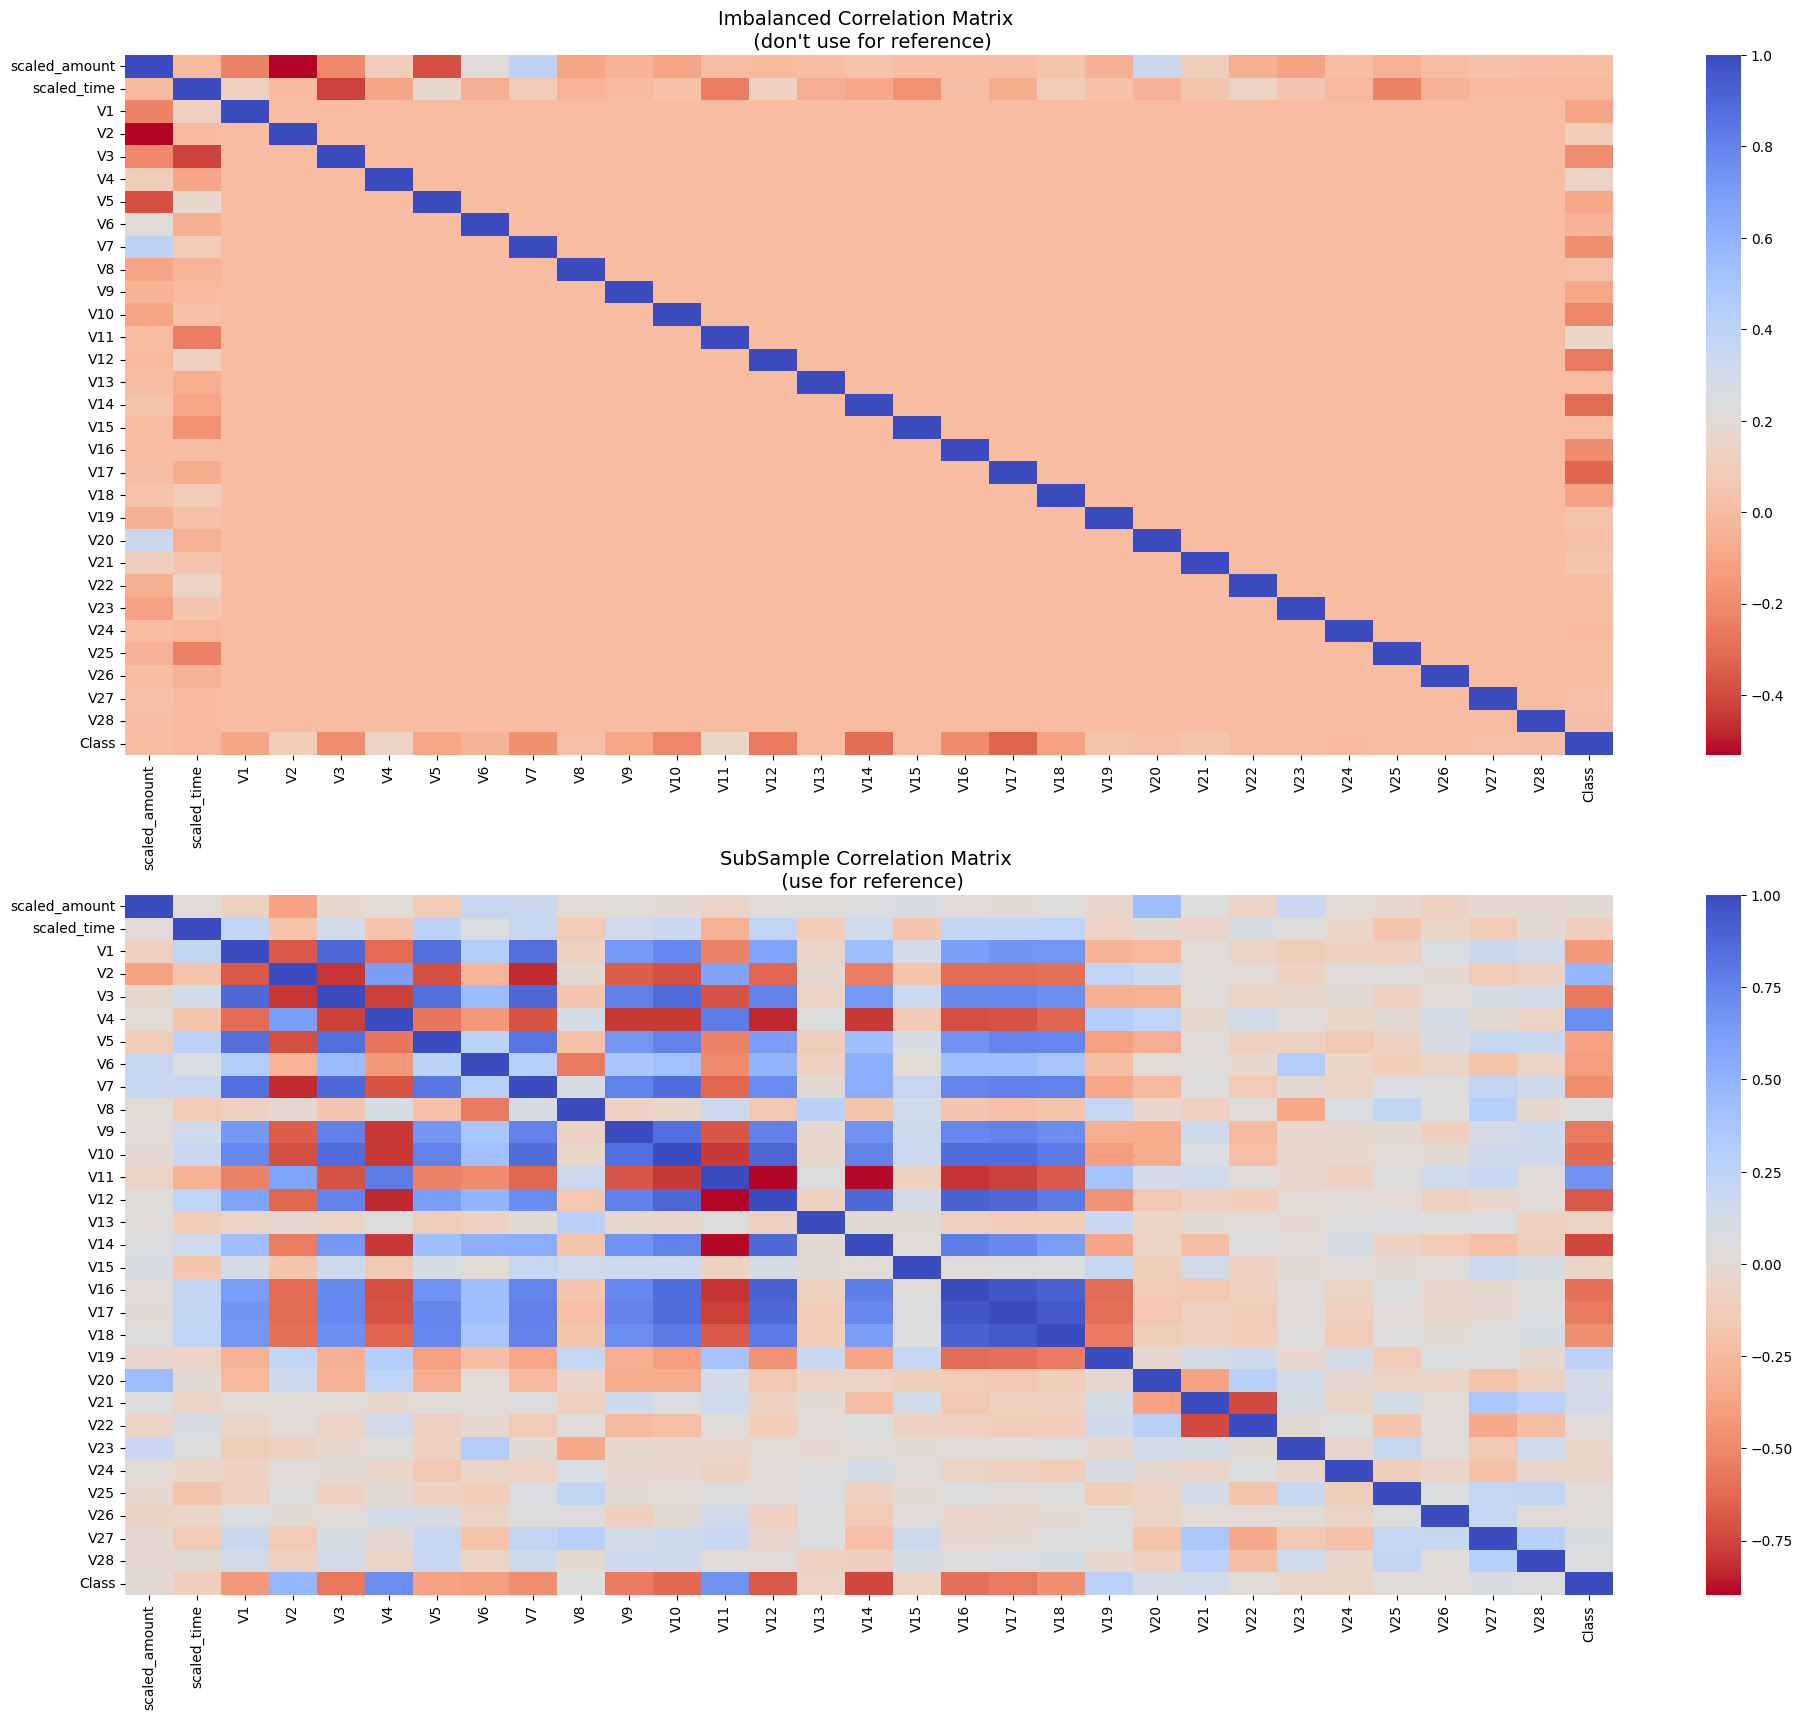

In [41]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [42]:
# 클래스와 양의 상관관계를 띄는 변수 -> 높을 수록 비정상일 확률 높음
sub_sample_corr.sort_values(by = 'Class', ascending = False)['Class'][1:5]

V4    0.70401
V11   0.67820
V2    0.48130
V19   0.26924
Name: Class, dtype: float64

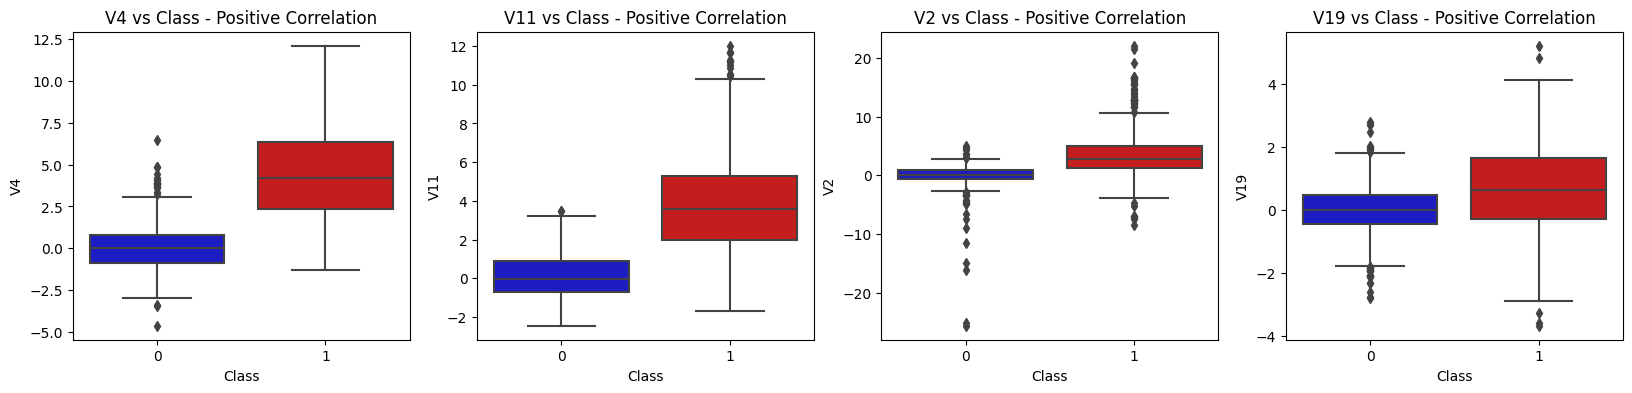

In [43]:
f, axes = plt.subplots(ncols = 4, figsize = (20,4))
sns.boxplot(x = 'Class', y = 'V4', data = new_df, palette= colors, ax = axes[0])
axes[0].set_title('V4 vs Class - Positive Correlation')

sns.boxplot(x = 'Class', y = 'V11', data = new_df, palette= colors, ax = axes[1])
axes[1].set_title('V11 vs Class - Positive Correlation')

sns.boxplot(x = 'Class', y = 'V2', data = new_df, palette= colors, ax = axes[2])
axes[2].set_title('V2 vs Class - Positive Correlation')

sns.boxplot(x = 'Class', y = 'V19', data = new_df, palette= colors, ax = axes[3])
axes[3].set_title('V19 vs Class - Positive Correlation')

plt.show()

In [44]:
# 클래스와 음의 상관관계를 띄는 변수 -> 낮을수록 비정상일 확률 높음
sub_sample_corr.sort_values(by = 'Class', ascending = True)['Class'][:4]

V14   -0.74793
V12   -0.68243
V10   -0.62505
V16   -0.59807
Name: Class, dtype: float64

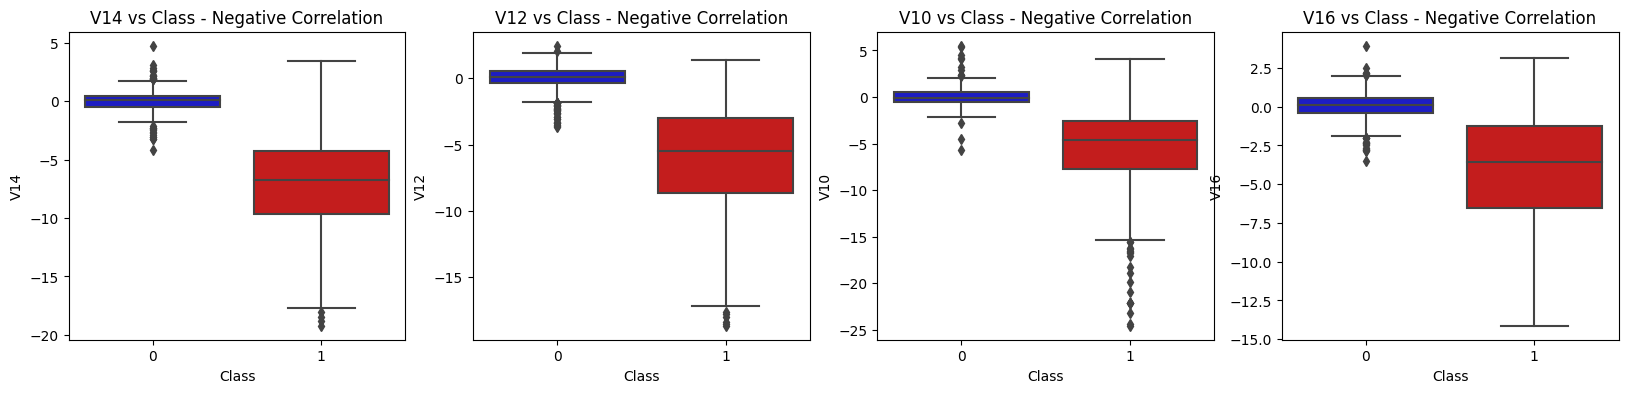

In [45]:
f, axes = plt.subplots(ncols = 4, figsize = (20,4))
sns.boxplot(x = 'Class', y = 'V14', data = new_df, palette= colors, ax = axes[0])
axes[0].set_title('V14 vs Class - Negative Correlation')

sns.boxplot(x = 'Class', y = 'V12', data = new_df, palette= colors, ax = axes[1])
axes[1].set_title('V12 vs Class - Negative Correlation')

sns.boxplot(x = 'Class', y = 'V10', data = new_df, palette= colors, ax = axes[2])
axes[2].set_title('V10 vs Class - Negative Correlation')

sns.boxplot(x = 'Class', y = 'V16', data = new_df, palette= colors, ax = axes[3])
axes[3].set_title('V16 vs Class - Negative Correlation')

plt.show()

# 이상 탐지
- 클래스와 높은 상관관계를 보이는 feature의 이상치를 제거 -> 모델의 정확도에 긍정적 영향

### Interquartile Range Method
- IQR: 75번째 백분위수와 , 25번째 백분위수의 차이로 계산 -> 임계값을 설정하여 초과하는 데이터 삭제
- Boxplot: 이상치를 시각화하기 좋음

### 이상치 제거의 Tradeoff
- 임계값이 높으면 적은 이상치를 탐지하고, 임계치가 낮으면 더 많은 이상치를 탐지한다.
- 임계값에 따라 데이터 손실이 나는데 이것은 모델 정확도에 영향을 미친다.
- 이상치가 많은 경우 또한 모델의 정확도에 영향을 미친다.
# -> 정보손실 또는 underfitting을 경계해야함


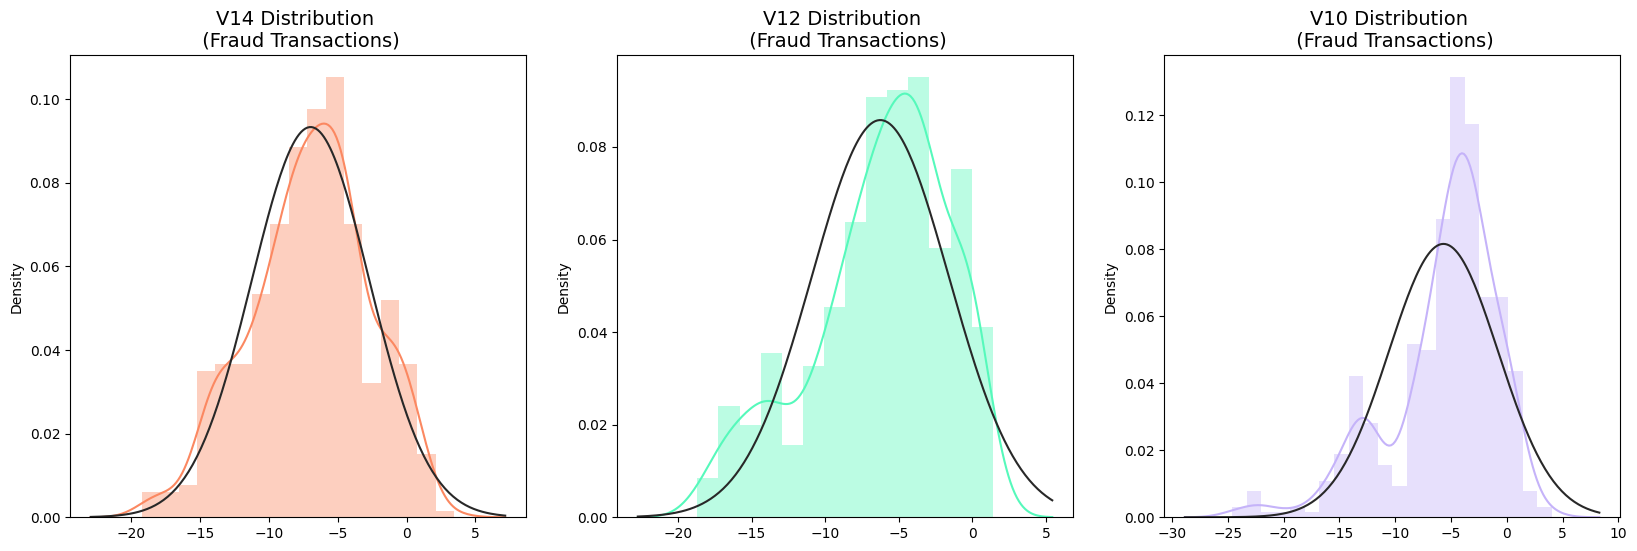

In [46]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [47]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -19.2143254902614, -18.8220867423816, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.5536970096458, -18.4311310279993, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-19.836148851696, -15.1237521

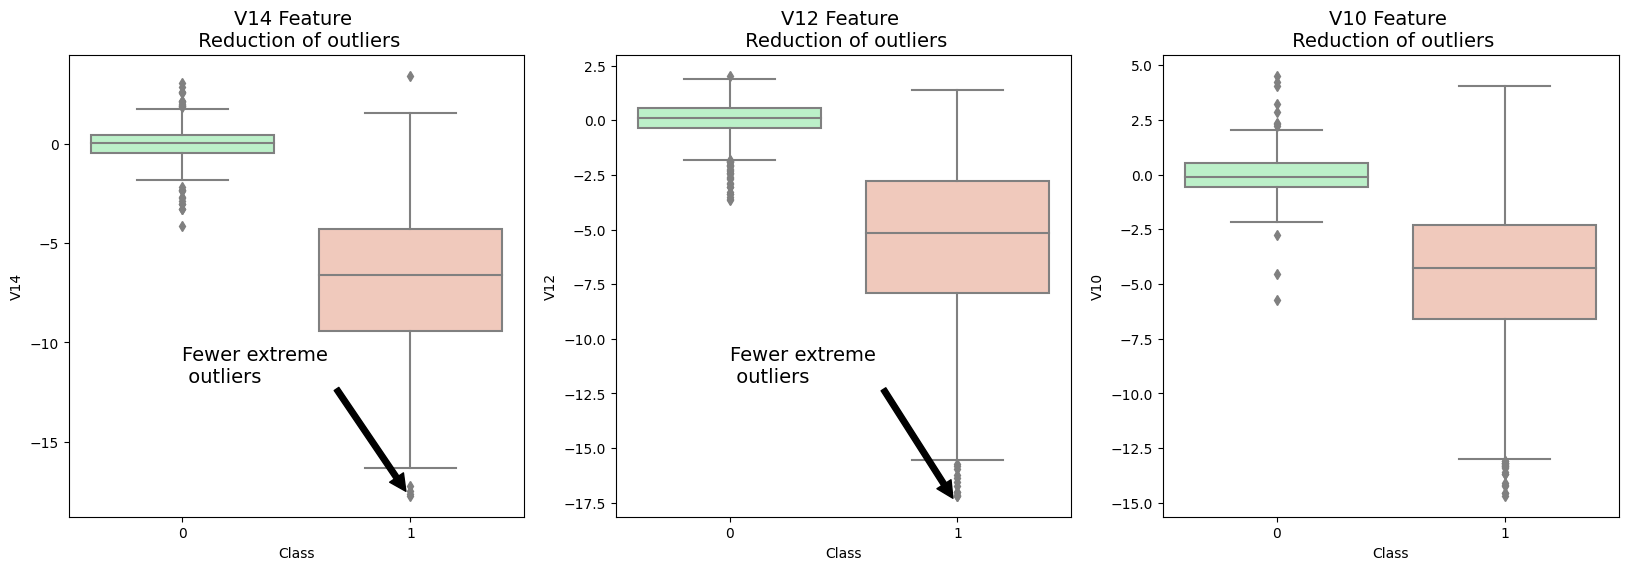

In [48]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

# 차원축소와 클러스터링
- t-SNE: 차원축소 정상데이터와 비정상데이터 클러스터링
- 추후 모델 성능을 가늠하기 위한 지표

In [49]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 4.6 s
PCA took 0.007 s
Truncated SVD took 0.007 s


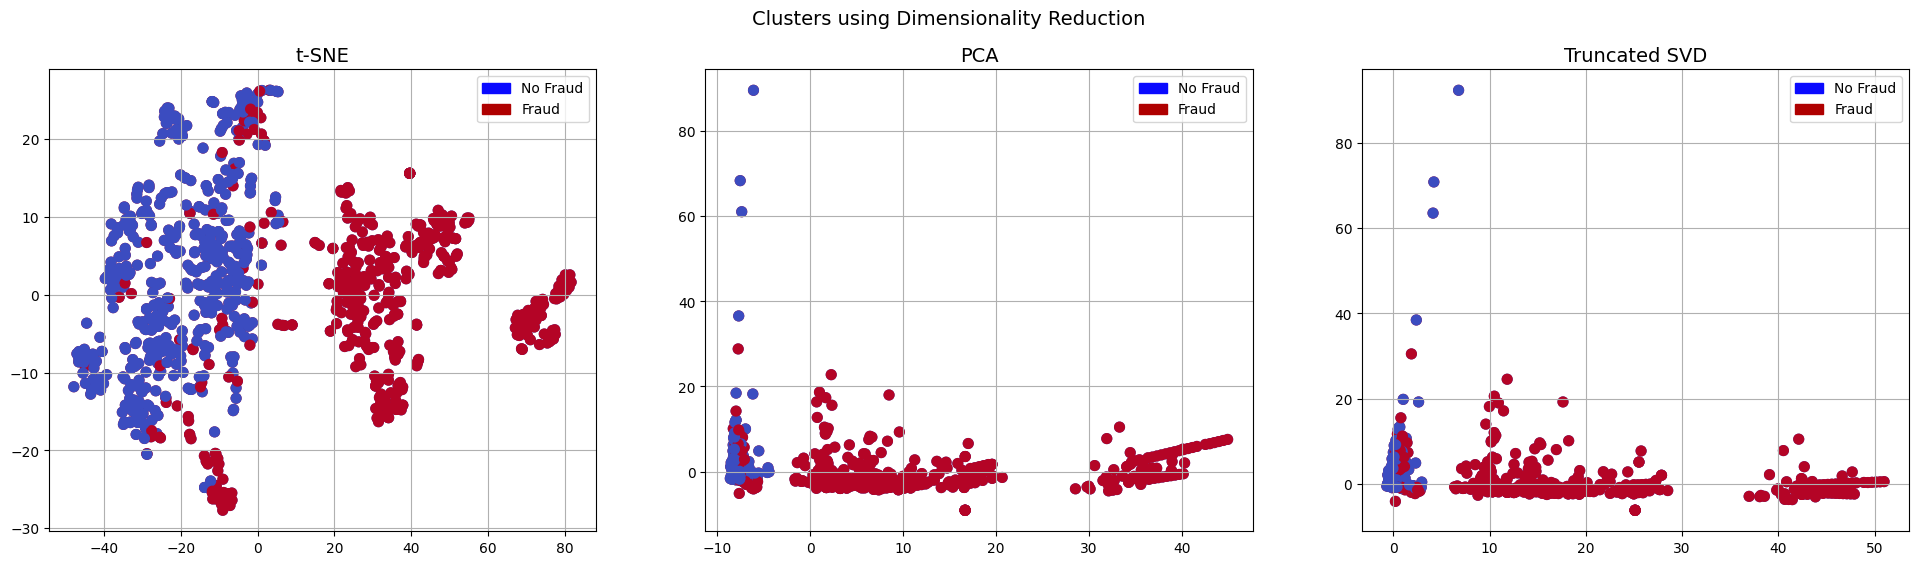

In [50]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# 분류모델(undersampling)

- Logistic Regression
- GridSearchCV -> 가장 좋은 파라미터 탐색

In [51]:
# Undersampling before cross validating
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [52]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [54]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}

In [55]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)# 파라미터는 (모델 training data의 feature, training data의 target, 폴드 수) 이다
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score


In [56]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {
    "penalty": ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {
    "n_neighbors": list(range(2,5,1)), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [57]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=10)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=10)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=10)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.25%
Knears Neighbors Cross Validation Score 92.99%
Support Vector Classifier Cross Validation Score 93.12%
DecisionTree Classifier Cross Validation Score 91.4%


In [58]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56947  56948  56949 ... 284804 284805 284806] Test: [    0     1     2 ... 62627 63034 63369]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56947  56948  56949 ... 115766 117101 119618]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113918 113919 113920 ... 177256 177366 177402]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170871 170872 170873 ... 227843 227844 227845]
Train: [     0      1      2 ... 227843 227844 227845] Test: [227846 227847 227848 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [61]:
undersample_pipeline

Pipeline(steps=[('nearmiss', NearMiss(sampling_strategy='majority')),
                ('logisticregression', LogisticRegression(C=10))])